# LDDS

# Tutorial 11: Dynamics using a vector field dataset

In [Tutorial 7](tutorial-7.ipynb) we studied the dynamics of a system for which the Potential Energy Surface (PES) was only available as a dataset.

This took us a step forward to deal with a more realistic situation where for a dynamical system observables are not available as analytical expressions.

Now in this tutorial, we will illustrate the setup for computing the LDs for the dynamics of a system where a time-dependent vector field is only available as a dataset.

We will deal with a discretised version of the vector field of the forced Duffing oscillator, that we studied in [Tutorial 2](tutorial-2.ipynb)

# Discretised forced duffing oscillator

As before, we call all the necessary functions first

In [1]:
import os, sys
import numpy as np
sys.path.insert(1, os.pardir)
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds

For this example, we sampled vector field data frames using its analytical expression to illustrate the LDDS setup. Then, we compare the LD outputs from when analytical or the numerical inputs of the vector field are employed. 

We sampled the time-dependent vector field from a uniform grid in the $XY$ plane, and a regular 1D grid in time ($t < 0$ and $t>0$),  and save this as a datafile.

In [2]:
from ldds.base import perturb_field
from ldds.vector_fields import Duffing1D, forcing
from ldds.testing_scripts import generate_vector_field_data

In [3]:
# define sample spatial grid and time-interval
x = np.linspace(-2, 2, 40)
y = np.linspace(-1.5, 1.5, 40)
t = np.linspace(-10, 10, 50)

# analytical vector field (non-autonomous)
vector_field_original = Duffing1D
vector_field_perturbed = perturb_field(vector_field_original, forcing)

# sample and store vector field data into file
filename = 'Duffing_perturbed_vector_field_data'
generate_vector_field_data(t, [x, y], vector_field_perturbed, filename)

Once the file is generated, the LDDS setup proceeds as usual for any system.

__BUT__ with the difference that the `vector_field` is defined as below.

In [4]:
from ldds.base import fit_vector_field

In [5]:
vector_field = fit_vector_field(filename)

The function `fit_vector_field` will fit the vector field dataset provided its filename, outputing a Python function. Currently, only possible for HDF5 files. 
This function will take by default files from the folder `ldds/vector_field_files`

> See `help(fit_vector_field)` for details of the fitting method or check the documentation. 

Then, we execute the cells below as before, for the system as in [Tutorial 2](tutorial-2.ipynb).

And we're done!

In [6]:
# Integration parameters
tau = 8

# LDp, p-value
p_value = 0.5

# Mesh parameters
ax1_min, ax1_max = [-1.6, 1.6]
ax2_min, ax2_max = [-1, 1]
N1, N2 = [100, 100]

In [7]:
grid_parameters = [(ax1_min, ax1_max, N1), (ax2_min, ax2_max, N2)]

In [10]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

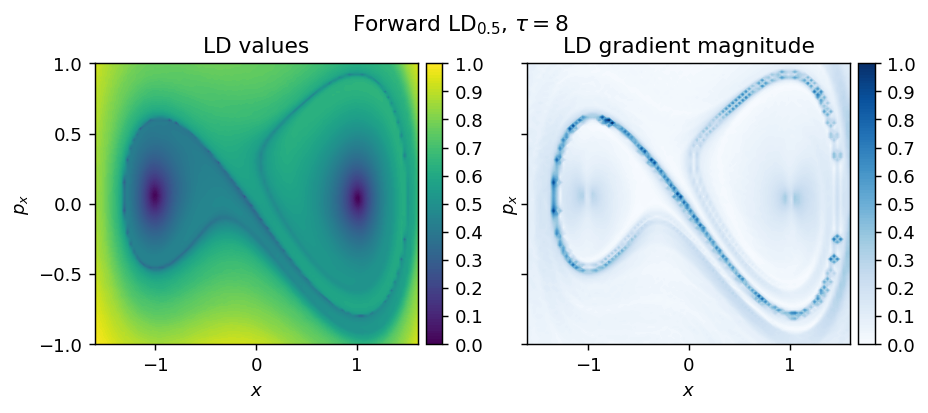

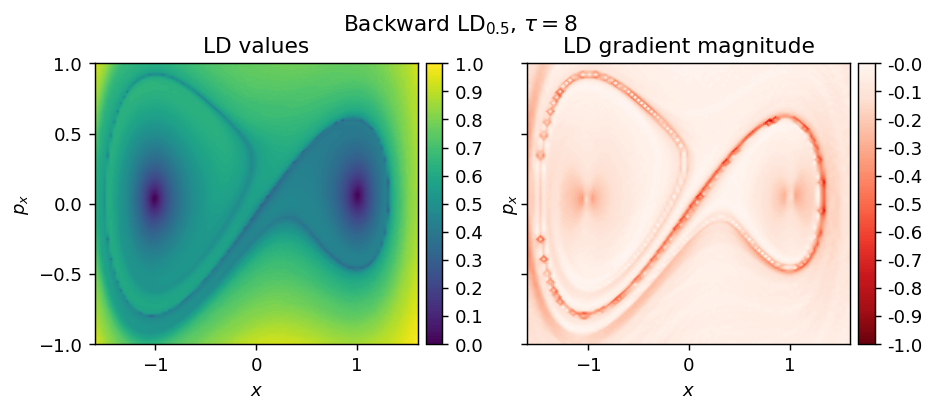

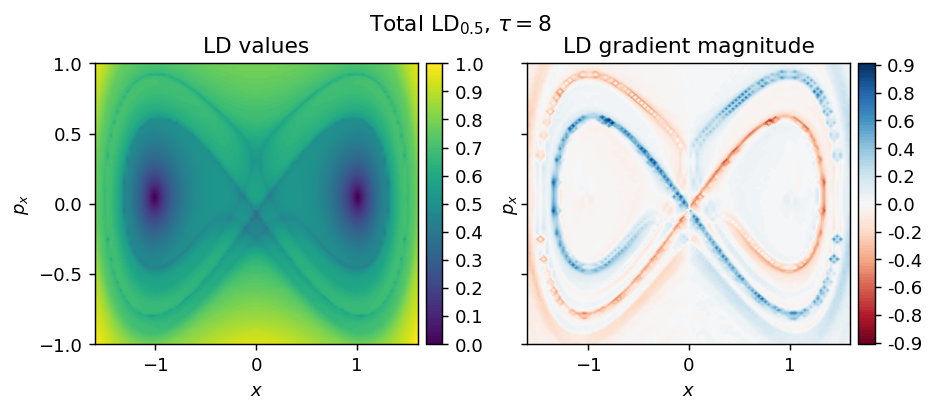

In [11]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value, interactive=False)